###                           ------------------------------------------
###                           INTELLIGENT TRAFFIC VOLUME PREDICTION USING  
###                                       MACHINE LEARNING
###                           ------------------------------------------

#### 1. Introduction

#### Urbanization and road traffic growth have grown by leaps and bounds, and effective traffic management has become a huge challenge for cities. 
#### Accurate forecasting of traffic volume helps in controlling congestion, route planning, and saving travel time. 
#### Traditional approaches for traffic analysis are limited and do not take into account intricate behaviours owing to variations in time, weather, and seasons. 
#### Thus, developing an intelligent system capable of predicting traffic volume from historical data and meteorological conditions is a priority in smart city planning and live traffic management.

#### 2. Objective

#### The main objective of the project is to develop a machine learning-based system to predict traffic volume for each hour depending on historical traffic and weather data. 
#### The system will:
#### •	Automatically generate predictions of traffic volume for any given hour.
#### •	Enable decision-making for city planners and travellers.
#### •	Describe the most impactful features on traffic patterns, i.e., weather, day of week, hour of day.


##### Data Preprocessing
##### 1.data cleaning
##### Handle missing values
##### Handle duplicates
##### Fix inconsistent or incorrect data
##### 2.data transformation
##### Encoding categorical data
##### Convert text labels into numbers
##### Techniques: One-Hot Encoding, Label Encoding
##### Feature scaling
##### Feature extraction or transformation
##### 3.Feature Engineering
##### lag features
##### rolling or moving features
##### combaine features
##### encode date/time extract date
##### 4.Feature Selection / Dimensionality Reduction
##### 5.Train-Test Split¶

In [8]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

##### Loading and inspecting data

In [10]:
DFo = pd.read_csv("MITVOL.csv")
DFo
DF = DFo.copy()

In [11]:
DF

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [12]:
DF.shape

(48204, 9)

In [13]:
DF.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [14]:
DF.info

<bound method DataFrame.info of       holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0         NaN  288.28      0.0      0.0          40        Clouds   
1         NaN  289.36      0.0      0.0          75        Clouds   
2         NaN  289.58      0.0      0.0          90        Clouds   
3         NaN  290.13      0.0      0.0          90        Clouds   
4         NaN  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199     NaN  283.45      0.0      0.0          75        Clouds   
48200     NaN  282.76      0.0      0.0          90        Clouds   
48201     NaN  282.73      0.0      0.0          90  Thunderstorm   
48202     NaN  282.09      0.0      0.0          90        Clouds   
48203     NaN  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1

#### Checking for missing values and duplicates and removing if any

In [16]:
Missing_Values = DF.isnull().sum()
print("Missing Values In Each Column")
print(Missing_Values)

Missing Values In Each Column
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [17]:
# Checking for duplicates
DF.duplicated().sum()

17

In [18]:
# Removing Duplicates
DF = DF.drop_duplicates()
DF.duplicated().sum()

0

In [19]:
# holiday has all NaN values so droping that column since that doesnt provide any information
DF.drop(columns=['holiday'], inplace=True)
DF

C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\774712977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.drop(columns=['holiday'], inplace=True)


,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


####  Convert date_time to datetime type

In [21]:
DF['date_time'] = pd.to_datetime(DF['date_time'])

# splitting date_time into components
DF['day_name'] = DF['date_time'].dt.day_name()


DF['month'] = DF['date_time'].dt.month

DF['day'] = DF['date_time'].dt.day

DF['year'] = DF['date_time'].dt.year

DF['hour'] = DF['date_time'].dt.time

DF['temp'] = DF['temp'] - 273.15

#DF.drop(columns=['date_time'], inplace=True)

DF


C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\2883713503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['date_time'] = pd.to_datetime(DF['date_time'])
C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\2883713503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['day_name'] = DF['date_time'].dt.day_name()
C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\2883713503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_name,month,day,year,hour
0,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,Tuesday,10,2,2012,09:00:00
1,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,Tuesday,10,2,2012,10:00:00
2,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,Tuesday,10,2,2012,11:00:00
3,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,Tuesday,10,2,2012,12:00:00
4,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,Tuesday,10,2,2012,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,Sunday,9,30,2018,19:00:00
48200,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,Sunday,9,30,2018,20:00:00
48201,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,Sunday,9,30,2018,21:00:00
48202,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,Sunday,9,30,2018,22:00:00


#### Representation using hour

#### -----------------------------------------------------------------------------------------------------------
#### 1️. Hourly Variation
#### -----------------------------------------------------------------------------------------------------------

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime is in proper format
DF['date_time'] = pd.to_datetime(DF['date_time'])

# Extract hour, weekday, and month if not already present
DF['hour'] = DF['date_time'].dt.hour
DF['day_name'] = DF['date_time'].dt.day_name()
DF['month'] = DF['date_time'].dt.month
DF['temp'] = DF['temp'] - 273.15



C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\4209024052.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['date_time'] = pd.to_datetime(DF['date_time'])
C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\4209024052.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['hour'] = DF['date_time'].dt.hour
C:\Users\ktomj\AppData\Local\Temp\ipykernel_1708\4209024052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

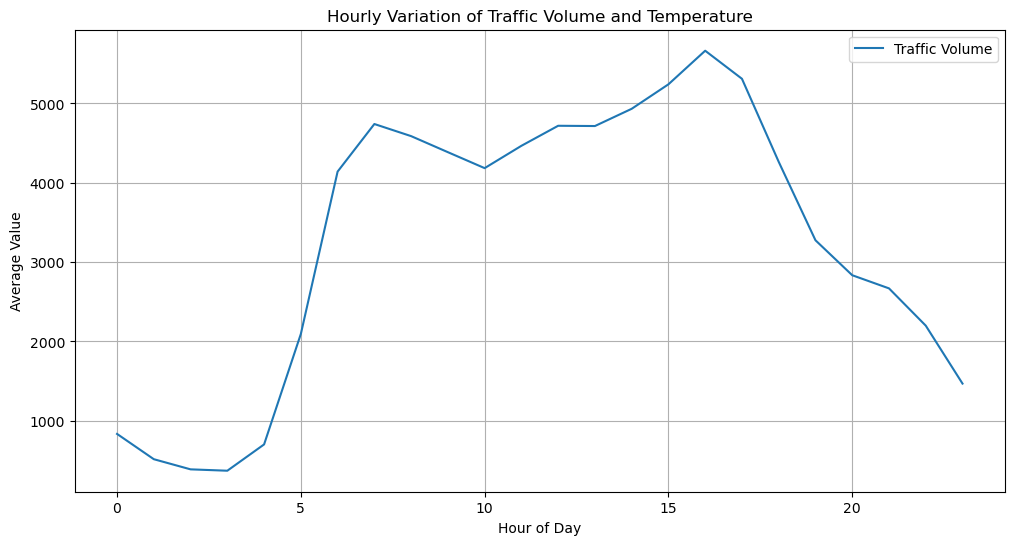

In [25]:
#hourly_data['hour'] = pd.to_numeric(hourly_data['hour'], errors='coerce')

hourly_data = DF.groupby('hour')[['traffic_volume', 'temp']].mean().reset_index()

#hourly_data['hour'] = pd.to_numeric(hourly_data['hour'], errors='coerce')

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data, x='hour', y='traffic_volume', label='Traffic Volume', color='tab:blue')
#sns.lineplot(data=hourly_data, x='hour', y='temp', label='Temperature', color='tab:red')

plt.title('Hourly Variation of Traffic Volume and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

#### -------------------------------
#### 2. Weekday Variation
#### -------------------------------


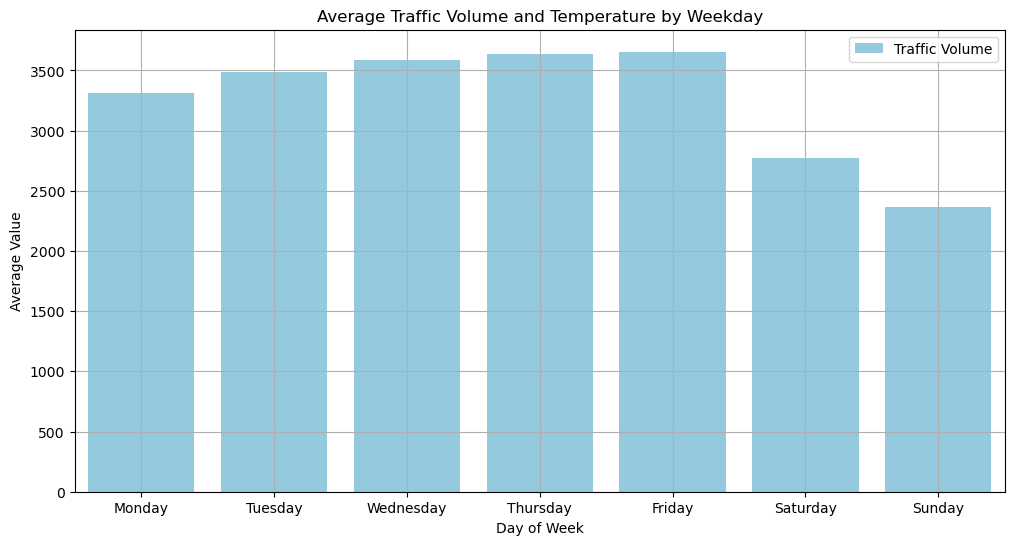

In [27]:
weekday_data = DF.groupby('day_name')[['traffic_volume', 'temp']].mean().reset_index()

# To keep weekday order correct:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data['day_name'] = pd.Categorical(weekday_data['day_name'], categories=day_order, ordered=True)
weekday_data = weekday_data.sort_values('day_name')

plt.figure(figsize=(12,6))
sns.barplot(data=weekday_data, x='day_name', y='traffic_volume', color='skyblue', label='Traffic Volume')
#sns.lineplot(data=weekday_data, x='day_name', y='temp', color='tab:red', label='Temperature', marker='o')

plt.title('Average Traffic Volume and Temperature by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

#### ------------------------------------------------------------------------------------
####                                 3. Month-Based Variation
#### --------------------------------------------------------------------------------------

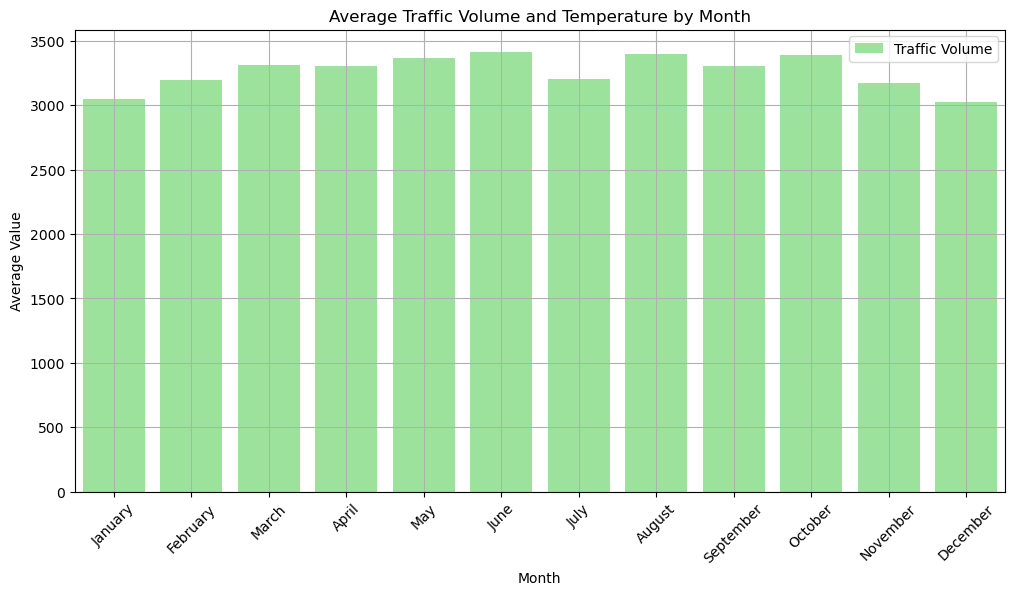

In [29]:
month_data = DF.groupby('month')[['traffic_volume', 'temp']].mean().reset_index()

# Optional: month names
import calendar
month_data['month_name'] = month_data['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(12,6))
sns.barplot(data=month_data, x='month_name', y='traffic_volume', color='lightgreen', label='Traffic Volume')
#sns.lineplot(data=month_data, x='month_name', y='temp', color='tab:red', label='Temperature', marker='o')

plt.title('Average Traffic Volume and Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Step 3: Handle Categorical Features (One-Hot Encoding)

In [31]:
#  Convert categorical variables into numeric using One-Hot Encoding
categorical_columns = ['weather_main', 'weather_description', 'day_name']
DF1 = pd.get_dummies(DF, columns=categorical_columns, drop_first=True)
DF1

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,month,day,year,hour,...,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,-258.02,0.0,0.0,40,2012-10-02 09:00:00,5545,10,2,2012,9,...,False,False,False,False,False,False,False,False,True,False
1,-256.94,0.0,0.0,75,2012-10-02 10:00:00,4516,10,2,2012,10,...,False,False,False,False,False,False,False,False,True,False
2,-256.72,0.0,0.0,90,2012-10-02 11:00:00,4767,10,2,2012,11,...,False,False,False,False,False,False,False,False,True,False
3,-256.17,0.0,0.0,90,2012-10-02 12:00:00,5026,10,2,2012,12,...,False,False,False,False,False,False,False,False,True,False
4,-255.16,0.0,0.0,75,2012-10-02 13:00:00,4918,10,2,2012,13,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,-262.85,0.0,0.0,75,2018-09-30 19:00:00,3543,9,30,2018,19,...,False,False,False,False,False,False,True,False,False,False
48200,-263.54,0.0,0.0,90,2018-09-30 20:00:00,2781,9,30,2018,20,...,False,False,False,False,False,False,True,False,False,False
48201,-263.57,0.0,0.0,90,2018-09-30 21:00:00,2159,9,30,2018,21,...,False,False,False,False,False,False,True,False,False,False
48202,-264.21,0.0,0.0,90,2018-09-30 22:00:00,1450,9,30,2018,22,...,False,False,False,False,False,False,True,False,False,False


In [32]:
# Find unique values in the weather_main column
unique_weather = DF['weather_main'].unique()

# Print the unique values
print("Unique values in 'weather_main' column:")
print(unique_weather)
len(unique_weather)

Unique values in 'weather_main' column:
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


11

In [33]:
unique_weather_description = DF['weather_description'].unique()

# Print the unique values
print("Unique values in 'weather_main' column:")
print(unique_weather_description)
print( 'Total =' ,len(unique_weather_description))

Unique values in 'weather_main' column:
['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 'light snow'
 'thunderstorm with drizzle' 'smoke' 'shower drizzle' 'light shower snow'
 'sleet']
Total = 38


***since One hot encoding is increasing the size of the dataset i want to try with another method***

 ### ***Label encoder***

In [36]:
DF2 = DF.copy()
DF2

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_name,month,day,year,hour
0,-258.02,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,Tuesday,10,2,2012,9
1,-256.94,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,Tuesday,10,2,2012,10
2,-256.72,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,Tuesday,10,2,2012,11
3,-256.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,Tuesday,10,2,2012,12
4,-255.16,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,Tuesday,10,2,2012,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,-262.85,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,Sunday,9,30,2018,19
48200,-263.54,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,Sunday,9,30,2018,20
48201,-263.57,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,Sunday,9,30,2018,21
48202,-264.21,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,Sunday,9,30,2018,22


In [37]:
le_weather_main = LabelEncoder()

DF2['weather_main_encoded'] = le_weather_main.fit_transform(DF2['weather_main'])

#  Drop original column
DF2.drop(columns=['weather_main'], inplace=True)

In [38]:
def simplify_weather(desc):
    desc = desc.lower()
    if 'rain' in desc or 'drizzle' in desc:
        return 'Rain'
    elif 'snow' in desc or 'sleet' in desc:
        return 'Snow'
    elif 'cloud' in desc:
        return 'Clouds'
    elif 'clear' in desc:
        return 'Clear'
    elif 'fog' in desc or 'mist' in desc or 'haze' in desc or 'smoke' in desc:
        return 'Fog'
    elif 'thunder' in desc:
        return 'Thunderstorm'
    else:
        return 'Other'

DF2['weather_description_simplified'] = DF2['weather_description'].apply(simplify_weather)

le_desc = LabelEncoder()
DF2['weather_description_encoded'] = le_desc.fit_transform(DF2['weather_description_simplified'])

# Drop old columns
DF2.drop(columns=['weather_description', 'weather_description_simplified'], inplace=True)


In [39]:
# --- Extract hour from time
#DF2['hour'] = DF2['hour'].astype(str).str.split(':').str[0].astype(int)
#DF2.drop(columns=['hour'], inplace=True)

In [40]:
DF2.drop(columns=['date_time'], inplace=True)
DF2

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_name,month,day,year,hour,weather_main_encoded,weather_description_encoded
0,-258.02,0.0,0.0,40,5545,Tuesday,10,2,2012,9,1,1
1,-256.94,0.0,0.0,75,4516,Tuesday,10,2,2012,10,1,1
2,-256.72,0.0,0.0,90,4767,Tuesday,10,2,2012,11,1,1
3,-256.17,0.0,0.0,90,5026,Tuesday,10,2,2012,12,1,1
4,-255.16,0.0,0.0,75,4918,Tuesday,10,2,2012,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,-262.85,0.0,0.0,75,3543,Sunday,9,30,2018,19,1,1
48200,-263.54,0.0,0.0,90,2781,Sunday,9,30,2018,20,1,1
48201,-263.57,0.0,0.0,90,2159,Sunday,9,30,2018,21,10,6
48202,-264.21,0.0,0.0,90,1450,Sunday,9,30,2018,22,1,1


### ***Create Lag Features (for temporal dependencies)***

In [42]:
# Assuming df is your DataFrame
DF2['lag_1'] = DF2['traffic_volume'].shift(1)
DF2['lag_2'] = DF2['traffic_volume'].shift(2)
DF2['lag_3'] = DF2['traffic_volume'].shift(3)
DF2

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_name,month,day,year,hour,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3
0,-258.02,0.0,0.0,40,5545,Tuesday,10,2,2012,9,1,1,NaN,NaN,NaN
1,-256.94,0.0,0.0,75,4516,Tuesday,10,2,2012,10,1,1,5545.0,NaN,NaN
2,-256.72,0.0,0.0,90,4767,Tuesday,10,2,2012,11,1,1,4516.0,5545.0,NaN
3,-256.17,0.0,0.0,90,5026,Tuesday,10,2,2012,12,1,1,4767.0,4516.0,5545.0
4,-255.16,0.0,0.0,75,4918,Tuesday,10,2,2012,13,1,1,5026.0,4767.0,4516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,-262.85,0.0,0.0,75,3543,Sunday,9,30,2018,19,1,1,3947.0,4132.0,4283.0
48200,-263.54,0.0,0.0,90,2781,Sunday,9,30,2018,20,1,1,3543.0,3947.0,4132.0
48201,-263.57,0.0,0.0,90,2159,Sunday,9,30,2018,21,10,6,2781.0,3543.0,3947.0
48202,-264.21,0.0,0.0,90,1450,Sunday,9,30,2018,22,1,1,2159.0,2781.0,3543.0


In [43]:
print(DF2.columns)
len(DF2.columns)

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume',
       'day_name', 'month', 'day', 'year', 'hour', 'weather_main_encoded',
       'weather_description_encoded', 'lag_1', 'lag_2', 'lag_3'],
      dtype='object')


15

In [44]:
DF2.shape

(48187, 15)

In [45]:
DF2 = DF2.sort_values(by=['year', 'month', 'day', 'hour']).reset_index(drop=True)
DF2

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_name,month,day,year,hour,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3
0,-258.02,0.0,0.0,40,5545,Tuesday,10,2,2012,9,1,1,NaN,NaN,NaN
1,-256.94,0.0,0.0,75,4516,Tuesday,10,2,2012,10,1,1,5545.0,NaN,NaN
2,-256.72,0.0,0.0,90,4767,Tuesday,10,2,2012,11,1,1,4516.0,5545.0,NaN
3,-256.17,0.0,0.0,90,5026,Tuesday,10,2,2012,12,1,1,4767.0,4516.0,5545.0
4,-255.16,0.0,0.0,75,4918,Tuesday,10,2,2012,13,1,1,5026.0,4767.0,4516.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,-262.85,0.0,0.0,75,3543,Sunday,9,30,2018,19,1,1,3947.0,4132.0,4283.0
48183,-263.54,0.0,0.0,90,2781,Sunday,9,30,2018,20,1,1,3543.0,3947.0,4132.0
48184,-263.57,0.0,0.0,90,2159,Sunday,9,30,2018,21,10,6,2781.0,3543.0,3947.0
48185,-264.21,0.0,0.0,90,1450,Sunday,9,30,2018,22,1,1,2159.0,2781.0,3543.0


In [46]:
DF2['day_name_num'] = DF2['day_name'].astype('category').cat.codes
DF2.drop(columns=['day_name'], inplace=True)
DF2

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day,year,hour,weather_main_encoded,weather_description_encoded,lag_1,lag_2,lag_3,day_name_num
0,-258.02,0.0,0.0,40,5545,10,2,2012,9,1,1,NaN,NaN,NaN,5
1,-256.94,0.0,0.0,75,4516,10,2,2012,10,1,1,5545.0,NaN,NaN,5
2,-256.72,0.0,0.0,90,4767,10,2,2012,11,1,1,4516.0,5545.0,NaN,5
3,-256.17,0.0,0.0,90,5026,10,2,2012,12,1,1,4767.0,4516.0,5545.0,5
4,-255.16,0.0,0.0,75,4918,10,2,2012,13,1,1,5026.0,4767.0,4516.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48182,-262.85,0.0,0.0,75,3543,9,30,2018,19,1,1,3947.0,4132.0,4283.0,3
48183,-263.54,0.0,0.0,90,2781,9,30,2018,20,1,1,3543.0,3947.0,4132.0,3
48184,-263.57,0.0,0.0,90,2159,9,30,2018,21,10,6,2781.0,3543.0,3947.0,3
48185,-264.21,0.0,0.0,90,1450,9,30,2018,22,1,1,2159.0,2781.0,3543.0,3


## 5. Train/Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:


X = DF2.drop(columns='traffic_volume')
y = DF2['traffic_volume']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 38549
Testing samples: 9638


In [50]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38549, 14)
y_train shape: (38549,)
X_test shape: (9638, 14)
y_test shape: (9638,)


# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## MODEL IMPLIMENTATION
# --------------------------------------------------------------------------------------

### 3.1RandomForestRegressor

In [53]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
# initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)



In [55]:
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [56]:
# Predict on the test set
rf_pred = rf_model.predict(X_test)

In [57]:
# Random Forest Evaluation
print("\nRandom Forest Evaluation:")
print("R-squared:", r2_score(y_test, rf_pred))
print("Mean Squared Error:", mean_squared_error(y_test, rf_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_pred))


Random Forest Evaluation:
R-squared: 0.9776135773919148
Mean Squared Error: 89499.25415933612
Mean Absolute Error: 184.71103414889302


### 3.2 XGBRegressor model

In [59]:
# 1. Import libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [60]:
# 2. Initialize and train the XGBoost Regressor

xgb_model = XGBRegressor(
    n_estimators=500,       # number of boosting rounds
    learning_rate=0.05,     # step size shrinkage
    max_depth=6,            # maximum depth of trees
    subsample=0.8,          # subsample ratio of the training instance
    colsample_bytree=0.8,   # subsample ratio of columns when constructing each tree
    random_state=42,
    tree_method='hist',     # faster training on large datasets
    n_jobs=-1               # use all cores
)


In [61]:
# 3. fit the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [62]:
# 4. make prediction
y_pred = xgb_model.predict(X_test)

In [63]:
# 5. Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 166.87
Root Mean Squared Error (RMSE): 267.92
R² Score: 0.9820


### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Model Evaluation

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    'R2': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
}

results = pd.DataFrame(metrics)
print(results)


           Model         MAE        RMSE        R2
0  Random Forest  184.711034  299.164259  0.977614
1        XGBoost  166.870864  267.918158  0.982046


### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Residual Analysis

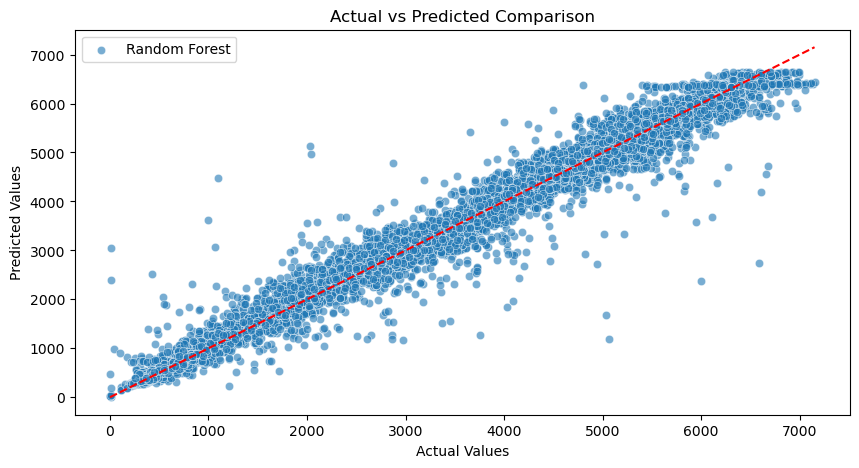

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
#sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()

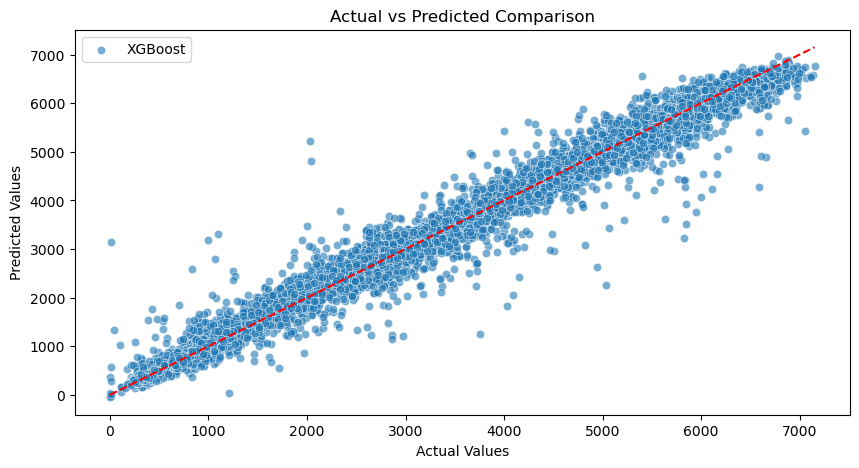

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
#sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()


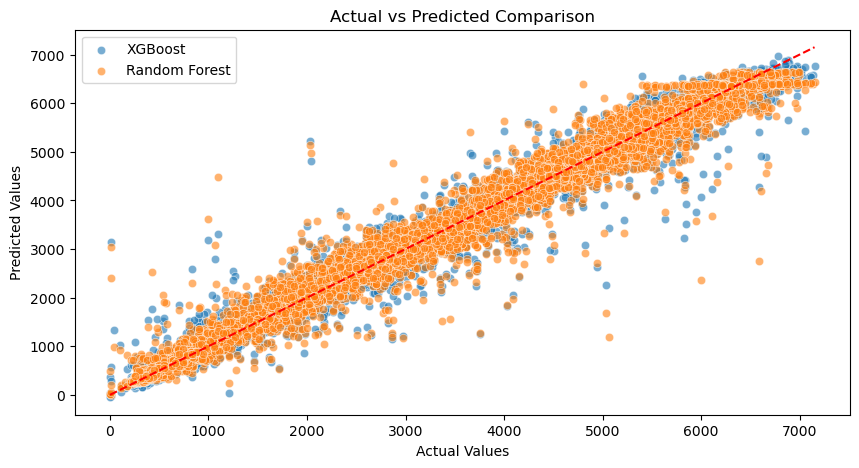

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_xgb, label='XGBoost', alpha=0.6)
sns.scatterplot(x=y_test, y=y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Comparison')
plt.legend()
plt.show()


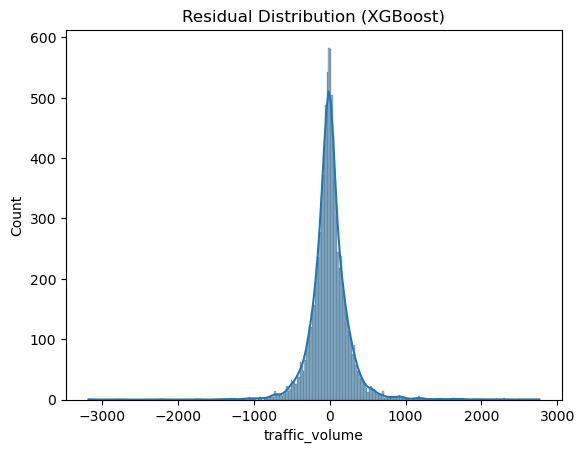

In [72]:
residuals = y_test - y_pred_xgb
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (XGBoost)")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Feature Importance Analysis

#### Random Forest

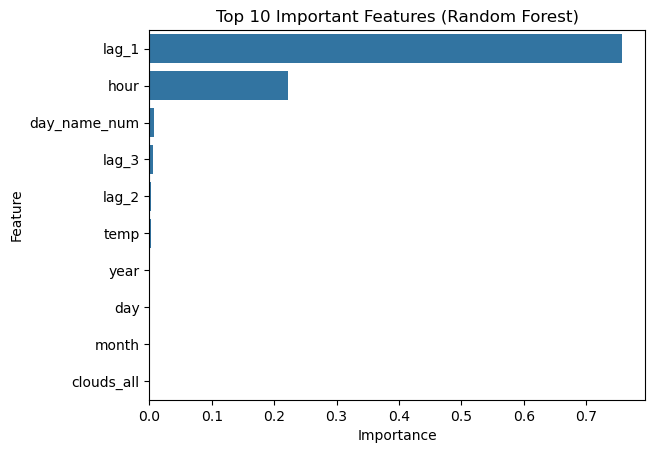

In [76]:
importances = rf_model.feature_importances_
features = X_train.columns
rf_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance.sort_values('Importance', ascending=False, inplace=True)

sns.barplot(data=rf_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

#### XGB Regressor

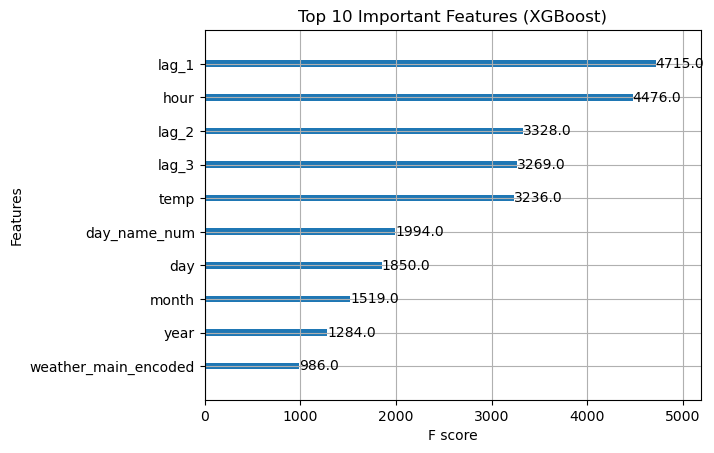

In [78]:
import xgboost as xgb

importances = rf_model.feature_importances_
features = X_train.columns
rf_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance.sort_values('Importance', ascending=False, inplace=True)
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title('Top 10 Important Features (XGBoost)')
plt.show()


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Hyperparameter Tuning (Optimization)

In [81]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}

grid = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    cv=3,
    scoring='r2',
    n_iter=10,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())


Cross-validated R²: 0.9741000276370159


In [83]:
!pip install xgboost==1.7.6




In [84]:
import xgboost, shap
print("xgboost:", xgboost.__version__)
print("shap:", shap.__version__)

xgboost: 1.7.6
shap: 0.49.1


In [85]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=6,
    colsample_bytree=0.8,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)





XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

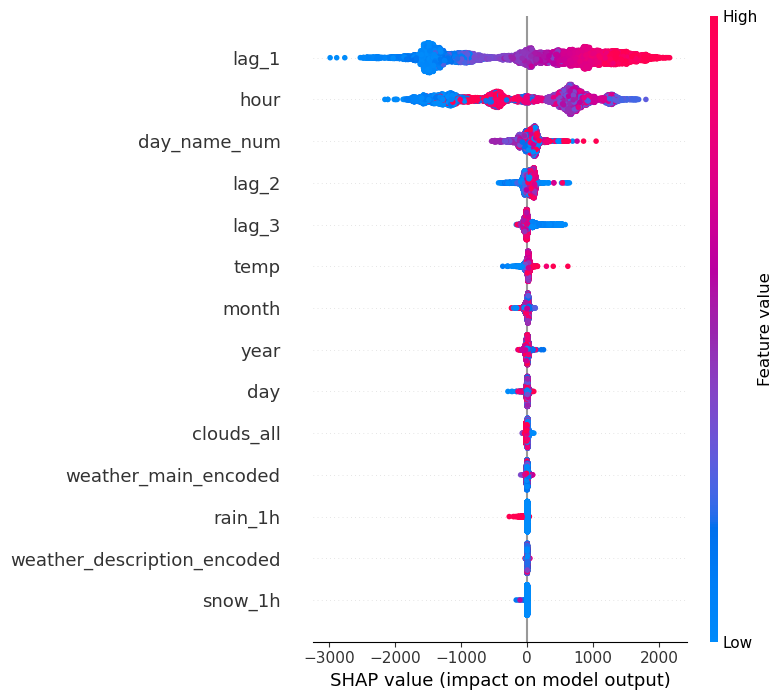

In [86]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


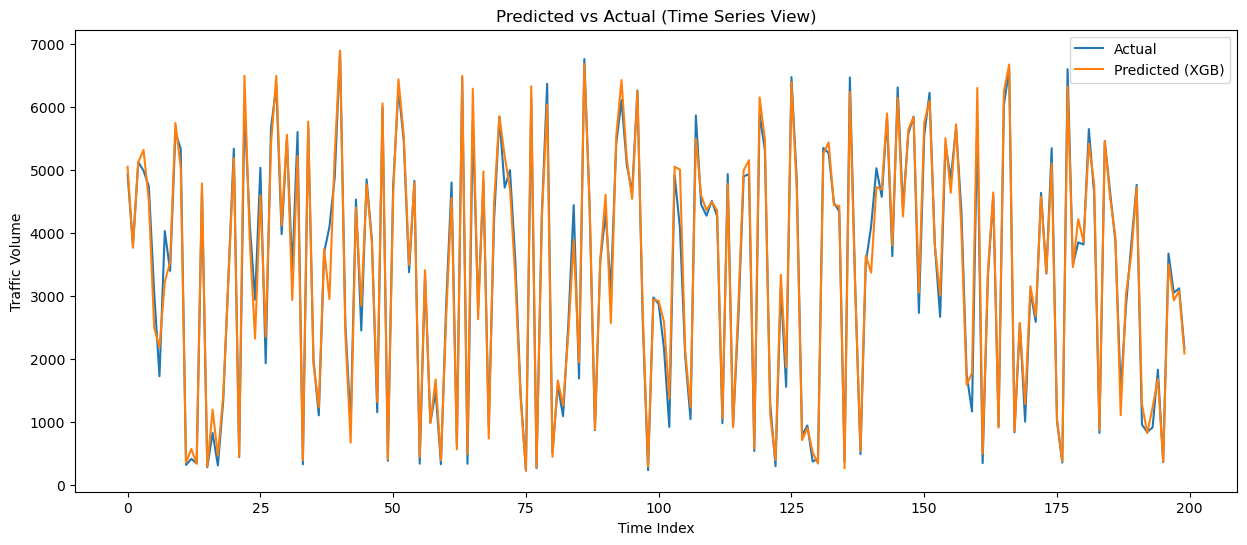

In [87]:
plt.figure(figsize=(15,6))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred_xgb[:200], label='Predicted (XGB)')
plt.title('Predicted vs Actual (Time Series View)')
plt.xlabel('Time Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()
